In [8]:
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

# SAQ - Modèle prédictif de la qualité d’un vin

In [2]:
file = open("saq-logo-caroussel.png", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=450,
    height=650,
)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x00\xfa\x08\x03\x00\x00\x00`uE|\x00\…

In [3]:
model = load('model_classifier.joblib') 
output = widgets.Output()
lbl_pred = widgets.Label() 
btn_run = widgets.Button(description='Classify')

In [28]:
style = {'description_width': 'initial'}

model = model
output = widgets.Output()
lbl_pred = widgets.Label() 
btn_run = widgets.Button(description='Classify')

a = widgets.FloatSlider(description='fixed acidity:', value=0, min=1, max=14, style=style)
b = widgets.FloatSlider(description='volatile acidity:', value=0, min=0.1, max=2.0,  style=style)
c = widgets.FloatSlider(description='citric acid:', value=0, min=0, max=1,  style=style)

d = widgets.FloatSlider(description='residual sugar:', value=0, min=0, max=16, style=style)
e = widgets.FloatSlider(description='chlorides:', value=0, min=0, max=1,  style=style)
f = widgets.FloatSlider(description='free sulfur dioxide:', value=10, min=1, max=72,  style=style)

g = widgets.FloatSlider(description='total sulfur dioxide:', value=0, min=1, max=300, style=style)
h = widgets.FloatSlider(description='density:', value=0, min=0, max=1,  style=style)
i = widgets.FloatSlider(description='pH:', value=0, min=1, max=5,  style=style)

j = widgets.FloatSlider(description='sulphates:', value=0, min=0, max=2,  style=style)
k = widgets.FloatSlider(description='alcohol:', value=0, min=5, max=15,  style=style)


hbox1 = widgets.HBox([a, b, c, d])

hbox2 = widgets.HBox([e, f, g, h])

hbox3 = widgets.HBox([i, j, k])

# Model Feature Importance
features = np.array(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])


def abc_classifier(change):
    lbl_pred.value = ''
    output.clear_output()
    with output:
      # a.value = change['new']
      # b.value = change['new']
      # c.value = change['new']
      data = [[a.value, b.value, c.value]]
      pred = model.predict(data)
      lbl_pred.value = f'Ce vin est noté {pred[0]} étoiles'
      print(lbl_pred.value)
      sorted_idx = model.feature_importances_.argsort()
      plt.barh(features[sorted_idx], model.feature_importances_[sorted_idx])
      plt.xlabel("Random Forest Feature Importance")

In [29]:
btn_run.on_click(abc_classifier)

Échelle des notes allant de 1 à 3

- 3 Stars :	*Excellent*
- 2 Stars :	*Casual Quaffing*
- 1 Star : *Very Ordinary*

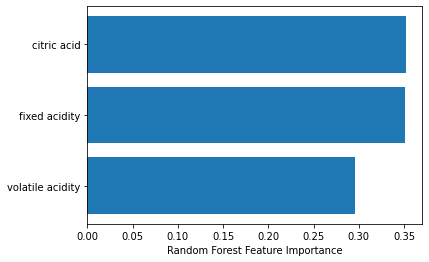

In [30]:
display(VBox([widgets.Label('Choissisez les valeurs'), hbox1, hbox2, hbox3, btn_run, output]))